<a href="https://colab.research.google.com/github/nour-said/glass-classification/blob/main/glass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "//content/drive/MyDrive/Colab Notebooks/glass.csv"
df = pd.read_csv(url)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
cr=df.corr()


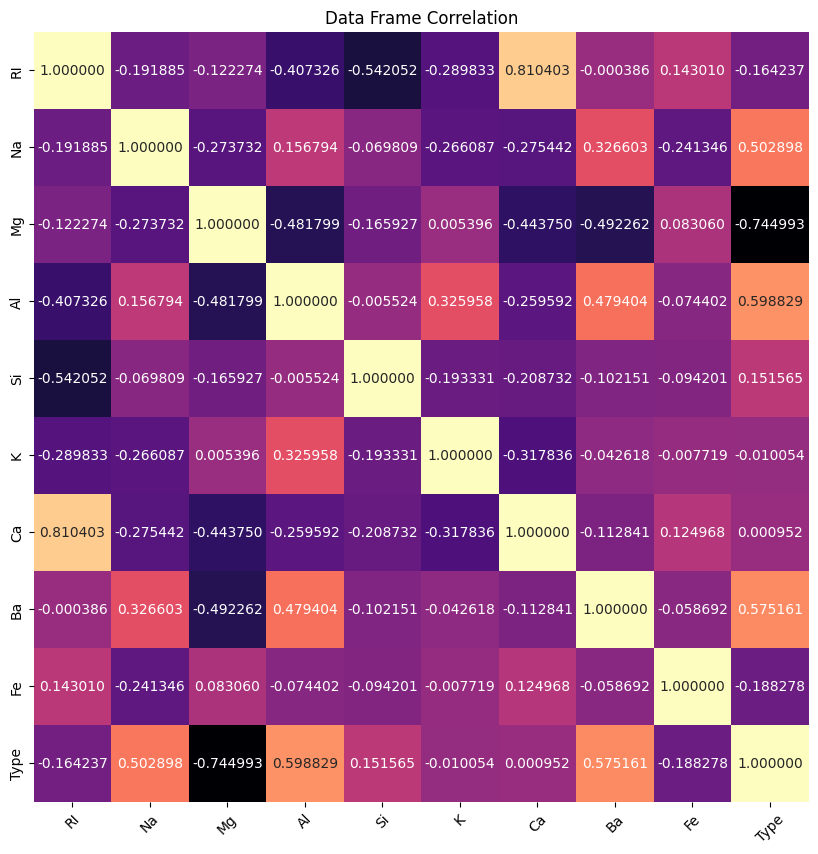

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cr, annot=True, cmap='magma',cbar=False, fmt='f')
plt.xticks(rotation=45)
plt.title('Data Frame Correlation')
plt.show()

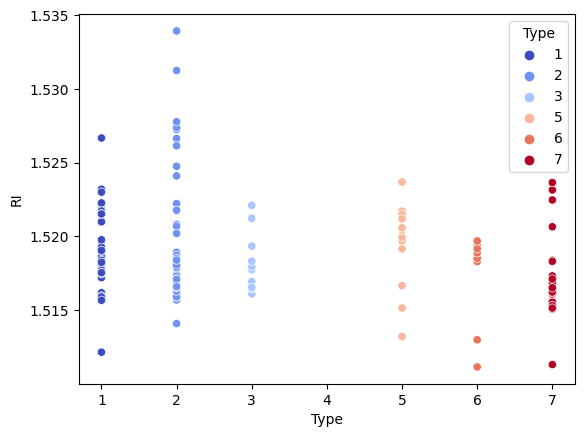

In [ ]:
sns.scatterplot(data=df,x='Type',y='RI',hue='Type',palette='coolwarm')
plt.show()

<ipython-input-156-5a8e8e934a78>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Type',y='Na',palette='coolwarm')


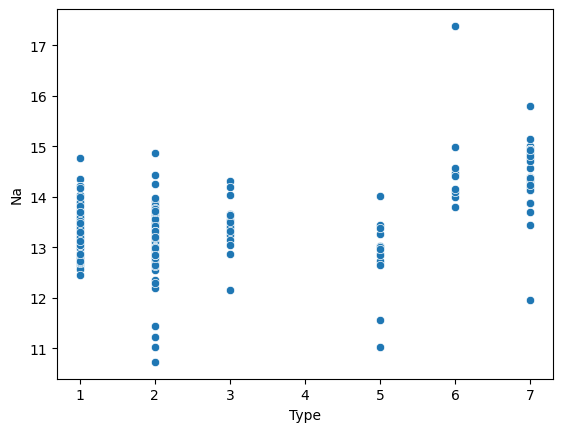

In [ ]:
sns.scatterplot(data=df,x='Type',y='Na',palette='coolwarm')
plt.show()

In [ ]:
y = df['Type']
X = df.drop(columns = ['Type'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

norm = StandardScaler().fit(X)

X = norm.transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state= 5,shuffle= True)


In [ ]:
log_reg = LogisticRegression(max_iter=200000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=200000)

In [ ]:
percentage = log_reg.score(X_train,y_train)
print(f"Accuracy={percentage*100}%")

Accuracy=69.79166666666666%


In [ ]:
percentage = log_reg.score(X_test,y_test)
print(f"Accuracy={percentage*100}%")

Accuracy=68.18181818181817%


In [ ]:
from sklearn import svm
svm = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state= 5,shuffle= True)

svm.fit(X_train,y_train)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train=svm.predict(X_train)
y_pred_test=svm.predict(X_test)
print('accuracy of x_train = ',accuracy_score(y_train,y_pred_train)*100)
print('accuracy of x_test = ',accuracy_score(y_test,y_pred_test)*100)

accuracy of x_train =  78.125
accuracy of x_test =  86.36363636363636
